# **Telecom Customer Churn Prediction**

In [1306]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1307]:
# read dataset
df = pd.read_csv(r'C:\Users\Test\Downloads\GDG\sessions\Session_10\workspace\cleaned_dataset.csv')

In [1308]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,female,0,Yes,No,1.0,No,No,dsl,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,male,0,No,No,34.0,Yes,No,dsl,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,3668-QPYBK,male,0,No,No,2.0,Yes,No,dsl,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,male,0,No,No,45.0,No,No,dsl,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,female,0,No,No,2.0,Yes,No,fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [1309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [1310]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.365483,64.761692,2281.916928
std,0.368612,24.556766,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [1311]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [1312]:
df.duplicated().sum()

np.int64(0)

In [1313]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [1314]:
corr=df.corr(numeric_only=True)


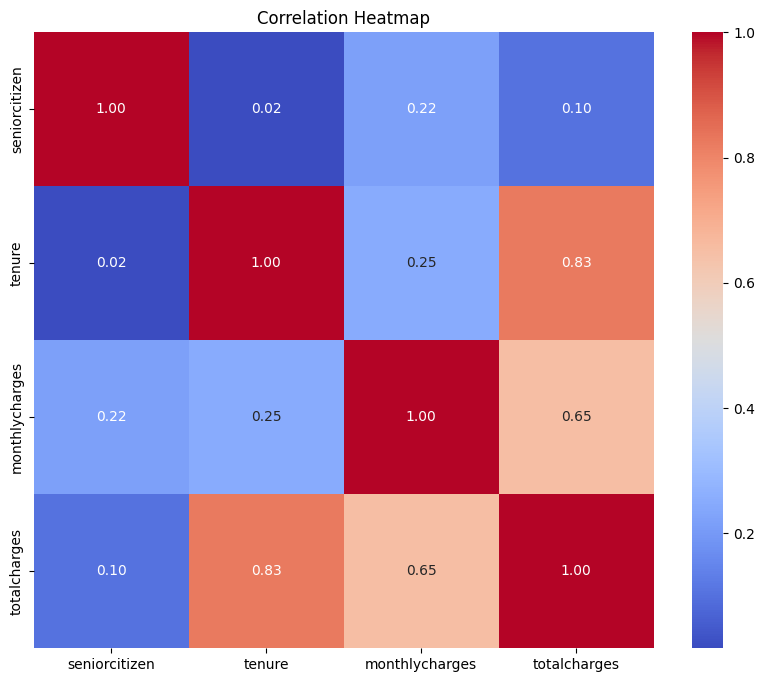

In [1315]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # إظهار الأرقام
    fmt=".2f",         # عدد المنازل العشرية
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

In [1316]:
df.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [1317]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

df.churn = le.fit_transform(df.churn)

In [1318]:
df['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [1319]:
global_mean= df['totalcharges'].mean()
global_mean

np.float64(2281.9169281556156)

In [1320]:
categorical_cols = df.select_dtypes(include=['object'])

In [1321]:
from IPython.display import display 
for feature in categorical_cols: 
    df_group = df.groupby(by=feature,as_index=False).churn.agg(['mean']).reset_index() 
    df_group['Risk']= df_group['mean']/global_mean 
    display(df_group)

,index,customerid,mean,Risk
0,0,0002-ORFBO,0.0,0.000000
1,1,0003-MKNFE,0.0,0.000000
2,2,0004-TLHLJ,1.0,0.000438
3,3,0011-IGKFF,1.0,0.000438
4,4,0013-EXCHZ,1.0,0.000438
...,...,...,...,...
7038,7038,9987-LUTYD,0.0,0.000000
7039,7039,9992-RRAMN,1.0,0.000438
7040,7040,9992-UJOEL,0.0,0.000000
7041,7041,9993-LHIEB,0.0,0.000000


,index,gender,mean,Risk
0,0,female,0.269209,0.000118
1,1,male,0.261603,0.000115


,index,partner,mean,Risk
0,0,No,0.329580,0.000144
1,1,Yes,0.196649,0.000086


,index,dependents,mean,Risk
0,0,No,0.312791,0.000137
1,1,Yes,0.154502,0.000068


,index,phoneservice,mean,Risk
0,0,No,0.249267,0.000109
1,1,Yes,0.267096,0.000117


,index,multiplelines,mean,Risk
0,0,No,0.250246,0.000110
1,1,Yes,0.286099,0.000125


,index,internetservice,mean,Risk
0,0,dsl,0.189591,0.000083
1,1,fiber optic,0.418928,0.000184
2,2,no,0.074050,0.000032


,index,onlinesecurity,mean,Risk
0,0,No,0.313296,0.000137
1,1,Yes,0.146112,0.000064


,index,onlinebackup,mean,Risk
0,0,No,0.291721,0.000128
1,1,Yes,0.215315,0.000094


,index,deviceprotection,mean,Risk
0,0,No,0.286518,0.000126
1,1,Yes,0.225021,0.000099


,index,techsupport,mean,Risk
0,0,No,0.311862,0.000137
1,1,Yes,0.151663,0.000066


,index,streamingtv,mean,Risk
0,0,No,0.243312,0.000107
1,1,Yes,0.300702,0.000132


,index,streamingmovies,mean,Risk
0,0,No,0.243795,0.000107
1,1,Yes,0.299414,0.000131


,index,contract,mean,Risk
0,0,Monthly,0.427097,0.000187
1,1,One year,0.112695,0.000049
2,2,Two year,0.028319,0.000012


,index,paperlessbilling,mean,Risk
0,0,No,0.163301,0.000072
1,1,Yes,0.335651,0.000147


,index,paymentmethod,mean,Risk
0,0,Bank transfer (automatic),0.167098,0.000073
1,1,Credit card (automatic),0.152431,0.000067
2,2,Manual,0.346744,0.000152


In [1322]:
# define y and X
y = df['churn']
X = df.drop(['customerid','churn'],axis=1)

In [1323]:
y.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [1324]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [1325]:
X,y = ros.fit_resample(X,y)

In [1326]:
y.value_counts()

churn
0    5174
1    5174
Name: count, dtype: int64

In [1327]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [1328]:
oe = OrdinalEncoder()

In [1329]:
X = oe.fit_transform(X)

In [1330]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [1331]:
#from imblearn.combine import SMOTETomek

# ده هيعمل SMOTE وبعدين ينظف الحدود
# smt = SMOTETomek(random_state=2529)
# X_train, y_train = smt.fit_resample(X_train, y_train)

In [1332]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [1333]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1334]:
# cross validation and Min Samples Leaf and Max Depth tuning
models = {
    "Logistic Regression": LogisticRegression(random_state=2529, max_iter=1000, C=1.0),
    "Decision Tree": DecisionTreeClassifier(random_state=2529, max_depth=10, min_samples_leaf=10),
    "Random Forest": RandomForestClassifier(random_state=2529, max_depth=10, min_samples_leaf=5, n_estimators=100)
}


In [1335]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # 1. التوقع على الداتا اللي ذاكرها (Train) عشان نشوف هو حفظ ولا فهم
    y_train_pred = model.predict(X_train)
    
    # 2. التوقع على الداتا الجديدة (Test)
    y_test_pred = model.predict(X_test)
    
    # حساب الـ F1 Score للاتنين
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    results.append({
        "Algorithm": name,
        "Training F1": round(train_f1, 4), # مستوى الحفظ
        "Testing F1": round(test_f1, 4),   # مستوى الفهم (التعميم)
        "Overfitting Gap": round(train_f1 - test_f1, 4), # كل ما الرقم ده يكبر، المشكلة بتكبر
        "Accuracy": round(accuracy_score(y_test, y_test_pred), 4)
    })



C:\Users\Test\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1336]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)

             Algorithm  Training F1  Testing F1  Overfitting Gap  Accuracy
2        Random Forest       0.8684      0.8079           0.0605    0.7967
1        Decision Tree       0.8294      0.7827           0.0466    0.7743
0  Logistic Regression       0.7737      0.7670           0.0067    0.7565


In [1337]:
import joblib

final_model = models["Random Forest"]

joblib.dump(final_model, "random_forest_model.pkl")


['random_forest_model.pkl']